In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
ev_path = 'Resources/Clean_EV_Data.csv'
ev_df = pd.read_csv(ev_path)
# ev_df.head()
census_path = 'Resources/2022_census.txt'
cen_df = pd.read_csv(census_path)

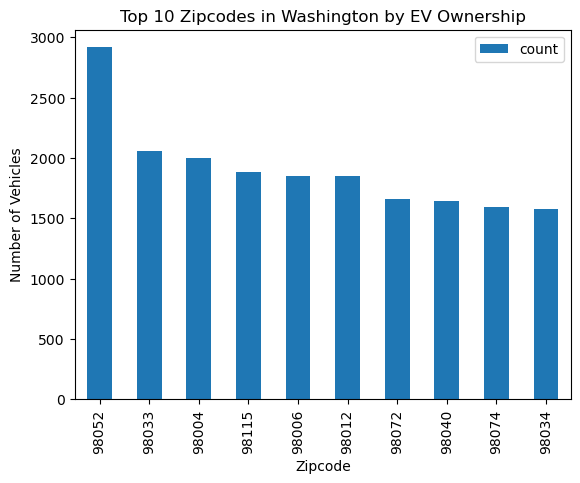

In [36]:
#Ownership by zipcode
zip_count = ev_df['Postal Code'].value_counts()
zip_count_df = pd.DataFrame(zip_count)

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
zip_df = zip_count_df.nlargest(10,columns=['count'])
zip_df

zip_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

plt.show()

In [37]:
# get population and zipcode separated from df
pop_df = cen_df[['WA Zipcode', 'Population']]
sorted_pop = pop_df.sort_values(by='Population', ascending=False)
top_pop_df = sorted_pop.head(10)
# get income and zipcode separated from df
income_df = cen_df[['WA Zipcode', 'Median Household Income']]
sorted_income = income_df.sort_values(by='Median Household Income', ascending=False)
top_income_df = sorted_income.head(10)
#get per capita and zipcode separted from df
pc_df = cen_df[['WA Zipcode','Income Per Capita']]

<BarContainer object of 10 artists>

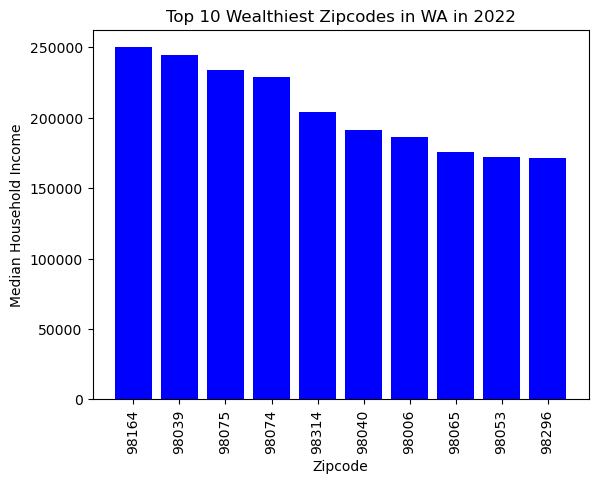

In [38]:
# plot income vs zipcode to find similarities
x_axis = np.arange(len(top_income_df['WA Zipcode']))
income_axis = top_income_df['Median Household Income']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_income_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Wealthiest Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Median Household Income")
plt.bar(x_axis, income_axis, color='b')
# plt.show()

**only 98074 are in the top 10 wealthiest and top 10 EV ownership dataframes**

<BarContainer object of 10 artists>

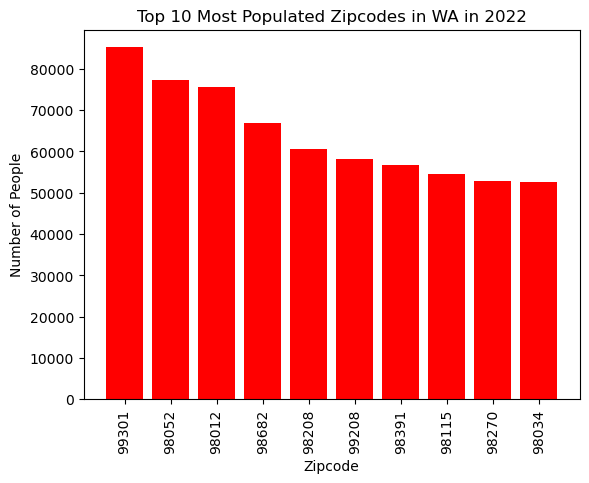

In [39]:
zip_axis = np.arange(len(top_pop_df['WA Zipcode']))
pop_axis = top_pop_df['Population']
tick_locations = [value for value in zip_axis]
plt.xticks(tick_locations, top_pop_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Most Populated Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Number of People")
plt.bar(zip_axis, pop_axis, color='r')
# plt.show()

**the zipcodes 98052 and 98115 show up both in the top 10 population and top 10 EV ownership graphs**

In [40]:
# run some linear regression to show if population affects EV ownership
# merge census and EV data in order to compute regression and relationships
cen_df = cen_df.rename(columns={'WA Zipcode':'Postal Code'})
ev_cen = cen_df.merge(ev_df, on='Postal Code').reset_index()
# clean dataframe to include only the columns we are working with
clean_merged_df = ev_cen[['Census Year',
                          'Postal Code',
                          'Population',
                          'Median Household Income',
                          'Income Per Capita',
#                           'County',
                          'Make',
                          'Model',
                          'Electric Vehicle Type']]
clean_merged_df

,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,Make,Model,Electric Vehicle Type
0,2022,98901,33106,55536,25237.0,NISSAN,LEAF,Battery Electric Vehicle (BEV)
1,2022,98901,33106,55536,25237.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
2,2022,98901,33106,55536,25237.0,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV)
3,2022,98901,33106,55536,25237.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
4,2022,98901,33106,55536,25237.0,MERCEDES-BENZ,B-CLASS,Battery Electric Vehicle (BEV)
...,...,...,...,...,...,...,...,...
112241,2022,99131,122,34081,31798.0,NISSAN,LEAF,Battery Electric Vehicle (BEV)
112242,2022,99348,1590,74211,32056.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV)
112243,2022,98336,594,76250,30549.0,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV)
112244,2022,98935,4378,60085,18814.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)


In [41]:
ev_count = clean_merged_df.groupby('Postal Code').count()
type_count = ev_count[['Electric Vehicle Type']]
type_count = type_count.reset_index()

In [61]:
income_per_capita = clean_merged_df.groupby('Income Per Capita')
income_per_capita

In [70]:
# population = clean_merged_df['Population'].unique()
# for each pop in population:

df = clean_merged_df[['Postal Code','Population']]
df_per_cap = df.drop_duplicates()
df_per_cap




,Postal Code,Population
0,98901,33106
69,98237,4979
90,98201,30587
340,98021,34993
1496,98203,36448
...,...,...
112241,99131,122
112242,99348,1590
112243,98336,594
112244,98935,4378


In [43]:
merged_percapita = pd.merge(df_per_cap, type_count, on='Postal Code', how='outer')
merged_percapita



,Postal Code,Population,Electric Vehicle Type
0,98901,33106,69
1,98237,4979,21
2,98201,30587,250
3,98021,34993,1156
4,98203,36448,344
...,...,...,...
491,99131,122,1
492,99348,1590,1
493,98336,594,1
494,98935,4378,1


In [62]:
merged_percapita['Population Percent'] = (merged_percapita['Electric Vehicle Type']/merged_percapita['Population'])*100
merged_percapita

,Postal Code,Population,Electric Vehicle Type,Population Percent
0,98901,33106,69,0.208421
1,98237,4979,21,0.421771
2,98201,30587,250,0.817341
3,98021,34993,1156,3.303518
4,98203,36448,344,0.943810
...,...,...,...,...
491,99131,122,1,0.819672
492,99348,1590,1,0.062893
493,98336,594,1,0.168350
494,98935,4378,1,0.022841


In [69]:
sorted =  merged_percapita.sort_values(by='Population Percent', ascending=False)
sorted

,Postal Code,Population,Electric Vehicle Type,Population Percent
344,98134,852,158,18.544601
451,98833,153,14,9.150327
153,98039,2923,242,8.279165
441,98286,158,11,6.962025
124,98072,25034,1661,6.634976
...,...,...,...,...
492,99348,1590,1,0.062893
437,98952,1724,1,0.058005
411,98857,3545,2,0.056417
403,98951,13145,5,0.038037


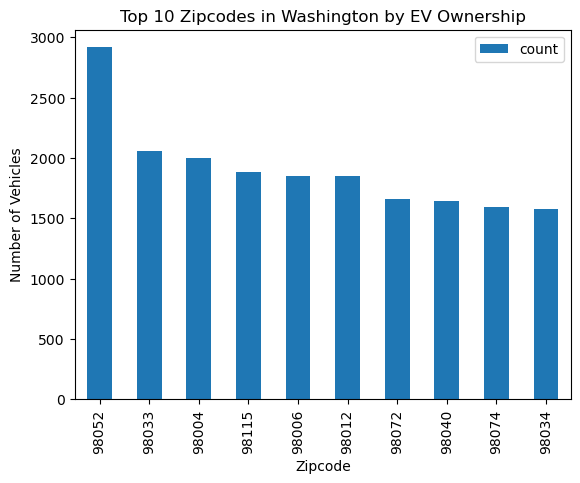

In [46]:
#Ownership by zipcode
zip_count = df['Postal Code'].value_counts()
zip_count_df = pd.DataFrame(zip_count)

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
zip_df = zip_count_df.nlargest(10,columns=['count'])
zip_df

zip_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

plt.show()

In [47]:
clean_merged_df[['Postal Code','Population']].dtypes

Postal Code    int64
Population     int64
dtype: object

In [48]:
clean_merged_df[['Postal Code', 'Population']].isnull().sum()

Postal Code    0
Population     0
dtype: int64

In [49]:
clean_merged_df['Postal Code'].value_counts()

Postal Code
98052    2916
98033    2059
98004    2001
98115    1880
98006    1852
         ... 
98243       1
98581       1
98526       1
99137       1
99179       1
Name: count, Length: 496, dtype: int64

In [50]:
clean_merged_df['Population'].value_counts()

Population
77324    2916
40425    2059
39161    2001
54457    1880
39753    1852
         ... 
452         1
425         1
399         1
175         1
568         1
Name: count, Length: 490, dtype: int64

In [51]:
clean_ev_cen = ev_cen.groupby('Make').agg({'Median Household Income':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_ev_cen.columns = clean_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_ev_cen_filtered = clean_ev_cen[clean_ev_cen['Postal Code_<lambda>']>10]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_ev_cen_filtered.shape)
clean_ev_cen_filtered.sort_values('Median Household Income_median')

(34, 4)
(31, 4)


,Make_,Median Household Income_median,Median Household Income_mean,Postal Code_<lambda>
22,MITSUBISHI,92005.0,96464.738014,192
5,CHEVROLET,96627.0,104296.235445,420
9,FORD,97953.0,104074.767047,392
31,TOYOTA,98057.0,105983.395700,368
4,CADILLAC,98168.0,102987.777778,85
6,CHRYSLER,98912.0,107885.954418,272
27,SMART,98912.0,106836.446886,140
15,KIA,102050.0,109234.568492,347
14,JEEP,102933.0,110194.394760,272
26,RIVIAN,103222.0,111950.947964,211


In [52]:
clean_ev_cen = ev_cen.groupby(['Make','Electric Vehicle Type']).agg({'Median Household Income':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_ev_cen.columns = clean_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_ev_cen_filtered = clean_ev_cen[clean_ev_cen['Postal Code_<lambda>']>10]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_ev_cen_filtered.shape)
clean_ev_cen_filtered.sort_values('Median Household Income_median')

(47, 5)
(43, 5)


,Make_,Electric Vehicle Type_,Median Household Income_median,Median Household Income_mean,Postal Code_<lambda>
31,MITSUBISHI,Plug-in Hybrid Electric Vehicle (PHEV),92005.0,95694.215385,180
13,FORD,Plug-in Hybrid Electric Vehicle (PHEV),95595.0,100865.511621,362
8,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),96615.0,102946.278974,383
7,CHEVROLET,Battery Electric Vehicle (BEV),97344.0,105543.589083,373
43,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),98057.0,105847.194251,366
6,CADILLAC,Plug-in Hybrid Electric Vehicle (PHEV),98168.0,102987.777778,85
21,KIA,Plug-in Hybrid Electric Vehicle (PHEV),98805.0,106584.004898,259
9,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),98912.0,107885.954418,272
37,SMART,Battery Electric Vehicle (BEV),98912.0,106836.446886,140
30,MITSUBISHI,Battery Electric Vehicle (BEV),100426.5,102725.234375,52


In [53]:
income_list = []
pc_list = []


In [54]:
#make vs income 
make_df = clean_merged_df.groupby('Make').value_counts()
make_df = make_df.reset_index()
all_makes = make_df['Make'].unique()
all_makes = list(all_makes)
for make in all_makes:
    make_value = make_df.loc[make_df['Make']==make, :]
    income_list.append(make_value['Median Household Income'].mean())
    pc_list.append(make_value['Income Per Capita'].mean())
make_df

,Make,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,Model,Electric Vehicle Type,count
0,AUDI,2022,98004,39161,157784,117764.0,E-TRON,Battery Electric Vehicle (BEV),26
1,AUDI,2022,98072,25034,157963,79154.0,E-TRON,Battery Electric Vehicle (BEV),26
2,AUDI,2022,98040,25464,190985,113575.0,E-TRON,Battery Electric Vehicle (BEV),26
3,AUDI,2022,98112,23456,153204,118391.0,E-TRON,Battery Electric Vehicle (BEV),24
4,AUDI,2022,98103,51878,122656,84147.0,A3,Plug-in Hybrid Electric Vehicle (PHEV),22
...,...,...,...,...,...,...,...,...,...
13955,VOLVO,2022,98105,50302,75214,58469.0,C40,Battery Electric Vehicle (BEV),1
13956,VOLVO,2022,98105,50302,75214,58469.0,S90,Plug-in Hybrid Electric Vehicle (PHEV),1
13957,VOLVO,2022,98108,23762,90179,46395.0,S60,Plug-in Hybrid Electric Vehicle (PHEV),1
13958,VOLVO,2022,98108,23762,90179,46395.0,XC40,Battery Electric Vehicle (BEV),1


In [55]:
income_type = []
pc_type = []

In [56]:
# EV type vs income 
type_df = clean_merged_df.groupby('Electric Vehicle Type').value_counts()
type_df = type_df.reset_index()
all_types = type_df['Electric Vehicle Type'].unique()

for car in all_types:
    type_value = type_df.loc[type_df['Electric Vehicle Type']==car, :]
    income_type.append(type_value['Median Household Income'].mean())
    pc_type.append(type_value['Income Per Capita'].mean())
type_df

,Electric Vehicle Type,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,Make,Model,count
0,Battery Electric Vehicle (BEV),2022,98052,77324,158457,82929.0,TESLA,MODEL 3,820
1,Battery Electric Vehicle (BEV),2022,98052,77324,158457,82929.0,TESLA,MODEL Y,643
2,Battery Electric Vehicle (BEV),2022,98004,39161,157784,117764.0,TESLA,MODEL 3,534
3,Battery Electric Vehicle (BEV),2022,98033,40425,163786,102001.0,TESLA,MODEL 3,500
4,Battery Electric Vehicle (BEV),2022,98012,75555,139474,58143.0,TESLA,MODEL Y,473
...,...,...,...,...,...,...,...,...,...
13955,Plug-in Hybrid Electric Vehicle (PHEV),2022,98166,22418,105013,60283.0,VOLVO,XC90,1
13956,Plug-in Hybrid Electric Vehicle (PHEV),2022,98166,22418,105013,60283.0,VOLVO,S60,1
13957,Plug-in Hybrid Electric Vehicle (PHEV),2022,98166,22418,105013,60283.0,PORSCHE,CAYENNE,1
13958,Plug-in Hybrid Electric Vehicle (PHEV),2022,98166,22418,105013,60283.0,HONDA,CLARITY,1


In [57]:
# summary tables
income_avg_make = pd.DataFrame({'Make of EV': all_makes,
                               'Average Median Income': income_list,
                               'Average Per Capita Income': pc_list})
make_summary = income_avg_make.round(decimals=2)
make_summary = make_summary.sort_values(by='Average Median Income')
income_avg_type = pd.DataFrame({'Electric Vehicle Type': all_types,
                              'Average Median Income': income_type,
                               'Average Per Capita Income': pc_type})
type_summary = income_avg_type.round(decimals=2)
type_summary = type_summary.sort_values(by='Average Median Income')

In [58]:
make_summary

,Make of EV,Average Median Income,Average Per Capita Income
2,BENTLEY,89286.00,43875.50
23,NISSAN,90488.75,46852.44
29,TESLA,91848.44,48018.53
5,CHEVROLET,92755.62,48002.28
6,CHRYSLER,95343.19,49295.60
9,FORD,95779.59,49310.62
31,TOYOTA,96549.20,50511.11
14,JEEP,97306.86,50343.90
7,FIAT,97859.24,50775.18
32,VOLKSWAGEN,98875.05,51894.55


In [59]:
type_summary

,Electric Vehicle Type,Average Median Income,Average Per Capita Income
0,Battery Electric Vehicle (BEV),100308.82,52766.13
1,Plug-in Hybrid Electric Vehicle (PHEV),101237.27,53046.82


<BarContainer object of 34 artists>

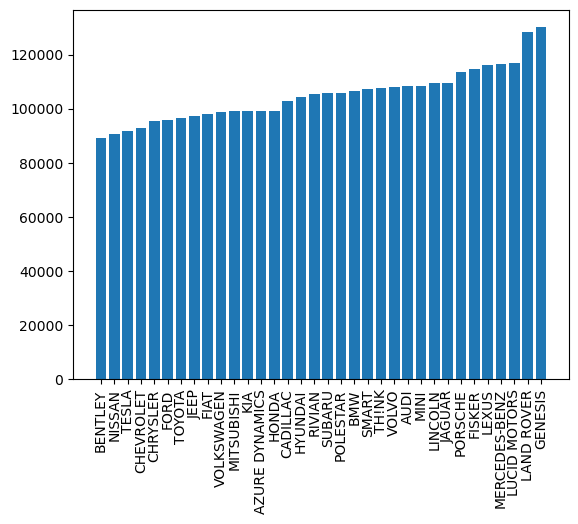

In [60]:
make_list = np.arange(len(make_summary['Make of EV']))
make_ticks = [value for value in make_list]
plt.xticks(make_ticks, make_summary['Make of EV'], rotation='vertical')
plt.bar(make_list, make_summary['Average Median Income'])